In [1]:
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Synthetic Data Creation

In [2]:
df_ini = pd.read_csv("synthetic_dataset.csv")
df_ini.head()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,weather_main,weather_desc,lat,lon,altitude,sea_level,dew_point,clouds,day_of_week,train_number,train_name,origin_code,origin_name,dest_code,dest_name,scheduled_arr_time,actual_arr_time,scheduled_dept_time,actual_dept_time,dwell_minutes,day_of_journey,curr_station_code,tracks_on_route,maintenance_type,trains_nearby
0,296.16,295.176594,294.929605,297.341504,52.0,1019,10.098892,351,53.304308,Fog,dense fog,20.4971,81.5425,998.0,296.16,9.74,34.37,Sunday,22105,Train_22105,JAT,Jammu Tawi,PUNE,Pune,9/12/2025 1:09,9/12/2025 1:06,9/12/2025 1:33,9/12/2025 1:55,49,1,JAT,4,NaN,5
1,289.63,290.306772,288.772736,289.640032,79.0,1012,6.009852,309,72.436285,Clear,clear sky,24.5384,82.0181,428.0,289.63,9.92,32.67,Monday,12964,Train_12964,BBS,Bhubaneswar,CSTM,Mumbai CST,9/12/2025 1:37,9/12/2025 1:33,9/12/2025 1:44,9/12/2025 1:52,19,1,BBS,5,NaN,11
2,304.58,305.071829,303.358091,304.816890,100.0,1019,9.114786,277,72.053686,Clear,clear sky,16.3244,76.9114,726.0,304.58,7.75,30.03,Tuesday,18518,Train_18518,ALD,Prayagraj,DDN,Dehradun,9/12/2025 2:03,9/12/2025 2:15,9/12/2025 2:32,9/12/2025 2:30,15,1,ALD,3,NaN,4
3,285.89,287.429004,284.237662,287.143537,95.0,1010,5.422360,96,88.931430,Rain,moderate rain,16.0779,75.7695,171.0,285.89,8.90,6.30,Wednesday,12011,Train_12011,PNBE,Patna Jn,MAS,Chennai Central,9/12/2025 3:57,9/12/2025 3:59,9/12/2025 4:04,9/12/2025 4:07,8,1,PNBE,5,NaN,3
4,288.64,288.137026,288.603297,289.273004,86.0,1011,8.414218,118,64.483533,Fog,dense fog,27.1549,78.5737,807.0,288.64,12.65,35.95,Thursday,12011,Train_12011,VSKP,Visakhapatnam,PUNE,Pune,9/12/2025 5:46,9/12/2025 5:49,9/12/2025 6:01,9/12/2025 6:17,28,1,PNBE,5,NaN,9


In [3]:
df_length = df_ini.shape[0]
df_length

1000

In [4]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 1000 non-null   float64
 1   feels_like           1000 non-null   float64
 2   temp_min             1000 non-null   float64
 3   temp_max             1000 non-null   float64
 4   humidity             890 non-null    float64
 5   pressure             1000 non-null   int64  
 6   wind_speed           1000 non-null   float64
 7   wind_deg             1000 non-null   int64  
 8   visibility           1000 non-null   float64
 9   weather_main         1000 non-null   object 
 10  weather_desc         1000 non-null   object 
 11  lat                  1000 non-null   float64
 12  lon                  1000 non-null   float64
 13  altitude             960 non-null    float64
 14  sea_level            1000 non-null   float64
 15  dew_point            1000 non-null   fl

In [5]:
df_ini['weather_main'].unique()

array(['Fog', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Clouds'], dtype=object)

In [6]:
df_ini.describe()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,lat,lon,altitude,sea_level,dew_point,clouds,train_number,dwell_minutes,day_of_journey,tracks_on_route,trains_nearby
count,1000.000000,1000.000000,1000.000000,1000.000000,890.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,960.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,300.467600,300.862356,299.452037,301.633285,73.213483,1012.040000,9.786024,184.160000,51.803124,21.925473,77.128913,540.791667,300.467600,9.79860,23.942900,13525.960000,13.680000,2.6000,3.457000,6.901000
std,9.486616,9.715476,9.494963,9.442576,15.176852,4.662632,3.118770,108.872253,24.062857,3.558853,4.117502,247.600915,9.486616,3.16522,10.495117,2523.893615,15.049388,1.2006,1.714377,4.288308
min,285.130000,285.248923,284.237662,286.322061,50.000000,1005.000000,1.237474,5.000000,0.000000,15.331100,70.042200,104.000000,285.130000,5.06000,5.460000,11010.000000,-21.000000,1.0000,1.000000,0.000000
25%,291.950000,291.865859,290.451254,292.697193,60.000000,1008.000000,7.654671,83.750000,37.060478,18.881125,73.771700,366.000000,291.950000,7.06500,13.452500,12280.000000,4.000000,2.0000,2.000000,3.000000
50%,300.350000,301.342400,299.353498,301.348407,72.000000,1011.500000,9.734384,201.500000,53.316150,22.160200,77.029950,576.500000,300.350000,9.48500,25.655000,12505.500000,14.500000,3.0000,4.000000,7.000000
75%,310.395000,311.115406,308.866861,311.644751,86.000000,1016.000000,11.862670,281.000000,68.428765,24.812375,80.067750,727.000000,310.395000,13.05250,32.930000,14014.000000,23.000000,4.0000,5.000000,11.000000
max,314.900000,316.464793,314.775312,316.073184,100.000000,1020.000000,18.741819,357.000000,100.000000,27.919600,84.980500,998.000000,314.900000,14.83000,39.970000,22105.000000,49.000000,5.0000,6.000000,14.000000


In [7]:
df_ini.dtypes

temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
humidity               float64
pressure                 int64
wind_speed             float64
wind_deg                 int64
visibility             float64
weather_main            object
weather_desc            object
lat                    float64
lon                    float64
altitude               float64
sea_level              float64
dew_point              float64
clouds                 float64
day_of_week             object
train_number             int64
train_name              object
origin_code             object
origin_name             object
dest_code               object
dest_name               object
scheduled_arr_time      object
actual_arr_time         object
scheduled_dept_time     object
actual_dept_time        object
dwell_minutes            int64
day_of_journey           int64
curr_station_code       object
tracks_on_route          int64
maintena

In [8]:
for col in df_ini:
    if df_ini[col].nunique() <= 10:
        print(f'Number of unique values in {col} is {df_ini[col].nunique()} and the null values are: {df_ini[col].isnull().sum()}')

Number of unique values in weather_main is 6 and the null values are: 0
Number of unique values in weather_desc is 6 and the null values are: 0
Number of unique values in day_of_week is 7 and the null values are: 0
Number of unique values in day_of_journey is 5 and the null values are: 0
Number of unique values in tracks_on_route is 6 and the null values are: 0
Number of unique values in maintenance_type is 4 and the null values are: 495


Since these values attributes happen to have class values, we may go ahead with encoding them appropriately.
But before we encode, we will clean the data for missing values.

## Synthetic Data Preprocessing

### Data Cleaning

#### Drop Columns with more than 20 null values

In [9]:
df_droppedna = df_ini.dropna(thresh = df_length - 200, axis = 1)
df_droppedna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 1000 non-null   float64
 1   feels_like           1000 non-null   float64
 2   temp_min             1000 non-null   float64
 3   temp_max             1000 non-null   float64
 4   humidity             890 non-null    float64
 5   pressure             1000 non-null   int64  
 6   wind_speed           1000 non-null   float64
 7   wind_deg             1000 non-null   int64  
 8   visibility           1000 non-null   float64
 9   weather_main         1000 non-null   object 
 10  weather_desc         1000 non-null   object 
 11  lat                  1000 non-null   float64
 12  lon                  1000 non-null   float64
 13  altitude             960 non-null    float64
 14  sea_level            1000 non-null   float64
 15  dew_point            1000 non-null   fl

None of the data columns were dropped since

#### Dropping Rows with more than 5 null values

In [10]:
df_droppednarows = df_droppedna.dropna(thresh = 25)
df_droppednarows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 1000 non-null   float64
 1   feels_like           1000 non-null   float64
 2   temp_min             1000 non-null   float64
 3   temp_max             1000 non-null   float64
 4   humidity             890 non-null    float64
 5   pressure             1000 non-null   int64  
 6   wind_speed           1000 non-null   float64
 7   wind_deg             1000 non-null   int64  
 8   visibility           1000 non-null   float64
 9   weather_main         1000 non-null   object 
 10  weather_desc         1000 non-null   object 
 11  lat                  1000 non-null   float64
 12  lon                  1000 non-null   float64
 13  altitude             960 non-null    float64
 14  sea_level            1000 non-null   float64
 15  dew_point            1000 non-null   fl

None of the rows were dropped

In [11]:
for col in df_droppednarows:
    if (df_droppednarows[col].isnull().sum() > 0):
        print(col, df_droppednarows[col].isnull().sum())

humidity 110
altitude 40


#### Imputing Humidity

Finally we have the two columns: humidity and altitude that we need to impute for null values.

In [12]:
print(df_droppednarows['humidity'].nunique())

41


In [13]:
print(df_droppednarows['humidity'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: humidity
Non-Null Count  Dtype  
--------------  -----  
890 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB
None


We can clearly observe that the type of data is float and it is a measureable continuous data

Mean Imputation

In [14]:
df_clean_ini = df_droppednarows
df_clean_ini['humidity'] = df_droppednarows['humidity'].fillna(round(df_droppednarows['humidity'].mean()))
print(df_clean_ini['humidity'].isnull().sum())

0


#### Imputing altitude

In [15]:
print(df_clean_ini['altitude'].nunique())

87


In [16]:
df_clean2 = df_clean_ini
df_clean2['altitude'] = df_clean_ini['altitude'].fillna(round(df_clean_ini['altitude'].mean(), 2))
print(df_clean2['altitude'].isnull().sum())
df_clean2['altitude'].head()

0


0    998.0
1    428.0
2    726.0
3    171.0
4    807.0
Name: altitude, dtype: float64

In [17]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temp                 1000 non-null   float64
 1   feels_like           1000 non-null   float64
 2   temp_min             1000 non-null   float64
 3   temp_max             1000 non-null   float64
 4   humidity             1000 non-null   float64
 5   pressure             1000 non-null   int64  
 6   wind_speed           1000 non-null   float64
 7   wind_deg             1000 non-null   int64  
 8   visibility           1000 non-null   float64
 9   weather_main         1000 non-null   object 
 10  weather_desc         1000 non-null   object 
 11  lat                  1000 non-null   float64
 12  lon                  1000 non-null   float64
 13  altitude             1000 non-null   float64
 14  sea_level            1000 non-null   float64
 15  dew_point            1000 non-null   fl

### Data is finally clean from all the null value

## Exploratory Data Analysis of the Synthetic Data

### Univariate Analysis

In [18]:
df_clean2.dtypes

temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
humidity               float64
pressure                 int64
wind_speed             float64
wind_deg                 int64
visibility             float64
weather_main            object
weather_desc            object
lat                    float64
lon                    float64
altitude               float64
sea_level              float64
dew_point              float64
clouds                 float64
day_of_week             object
train_number             int64
train_name              object
origin_code             object
origin_name             object
dest_code               object
dest_name               object
scheduled_arr_time      object
actual_arr_time         object
scheduled_dept_time     object
actual_dept_time        object
dwell_minutes            int64
day_of_journey           int64
curr_station_code       object
tracks_on_route          int64
trains_n

### Drop unnecessary columns

In [19]:
df_clean2 = df_clean2.drop(['train_number', 'train_name', 'origin_name', 'dest_name', 'weather_desc'], axis = 1)
df_clean2.columns

Index(['temp', 'feels_like', 'temp_min', 'temp_max', 'humidity', 'pressure',
       'wind_speed', 'wind_deg', 'visibility', 'weather_main', 'lat', 'lon',
       'altitude', 'sea_level', 'dew_point', 'clouds', 'day_of_week',
       'origin_code', 'dest_code', 'scheduled_arr_time', 'actual_arr_time',
       'scheduled_dept_time', 'actual_dept_time', 'dwell_minutes',
       'day_of_journey', 'curr_station_code', 'tracks_on_route',
       'trains_nearby'],
      dtype='object')

In [20]:
df_clean2.shape

(1000, 28)

#### Find Continuous columns

In [21]:
# Select initial continuous columns
continuous_cols_ini = df_clean2.select_dtypes(include = ['float64', 'int64']).columns

# Create a new list containing only the columns with 10 or more unique values
continuous_cols = [col for col in continuous_cols_ini if df_clean2[col].nunique() >= 10]

# You can now use final_continuous_cols for your analysis
print(len(continuous_cols))
continuous_cols

17


['temp',
 'feels_like',
 'temp_min',
 'temp_max',
 'humidity',
 'pressure',
 'wind_speed',
 'wind_deg',
 'visibility',
 'lat',
 'lon',
 'altitude',
 'sea_level',
 'dew_point',
 'clouds',
 'dwell_minutes',
 'trains_nearby']

## Plotting 

### Histograms

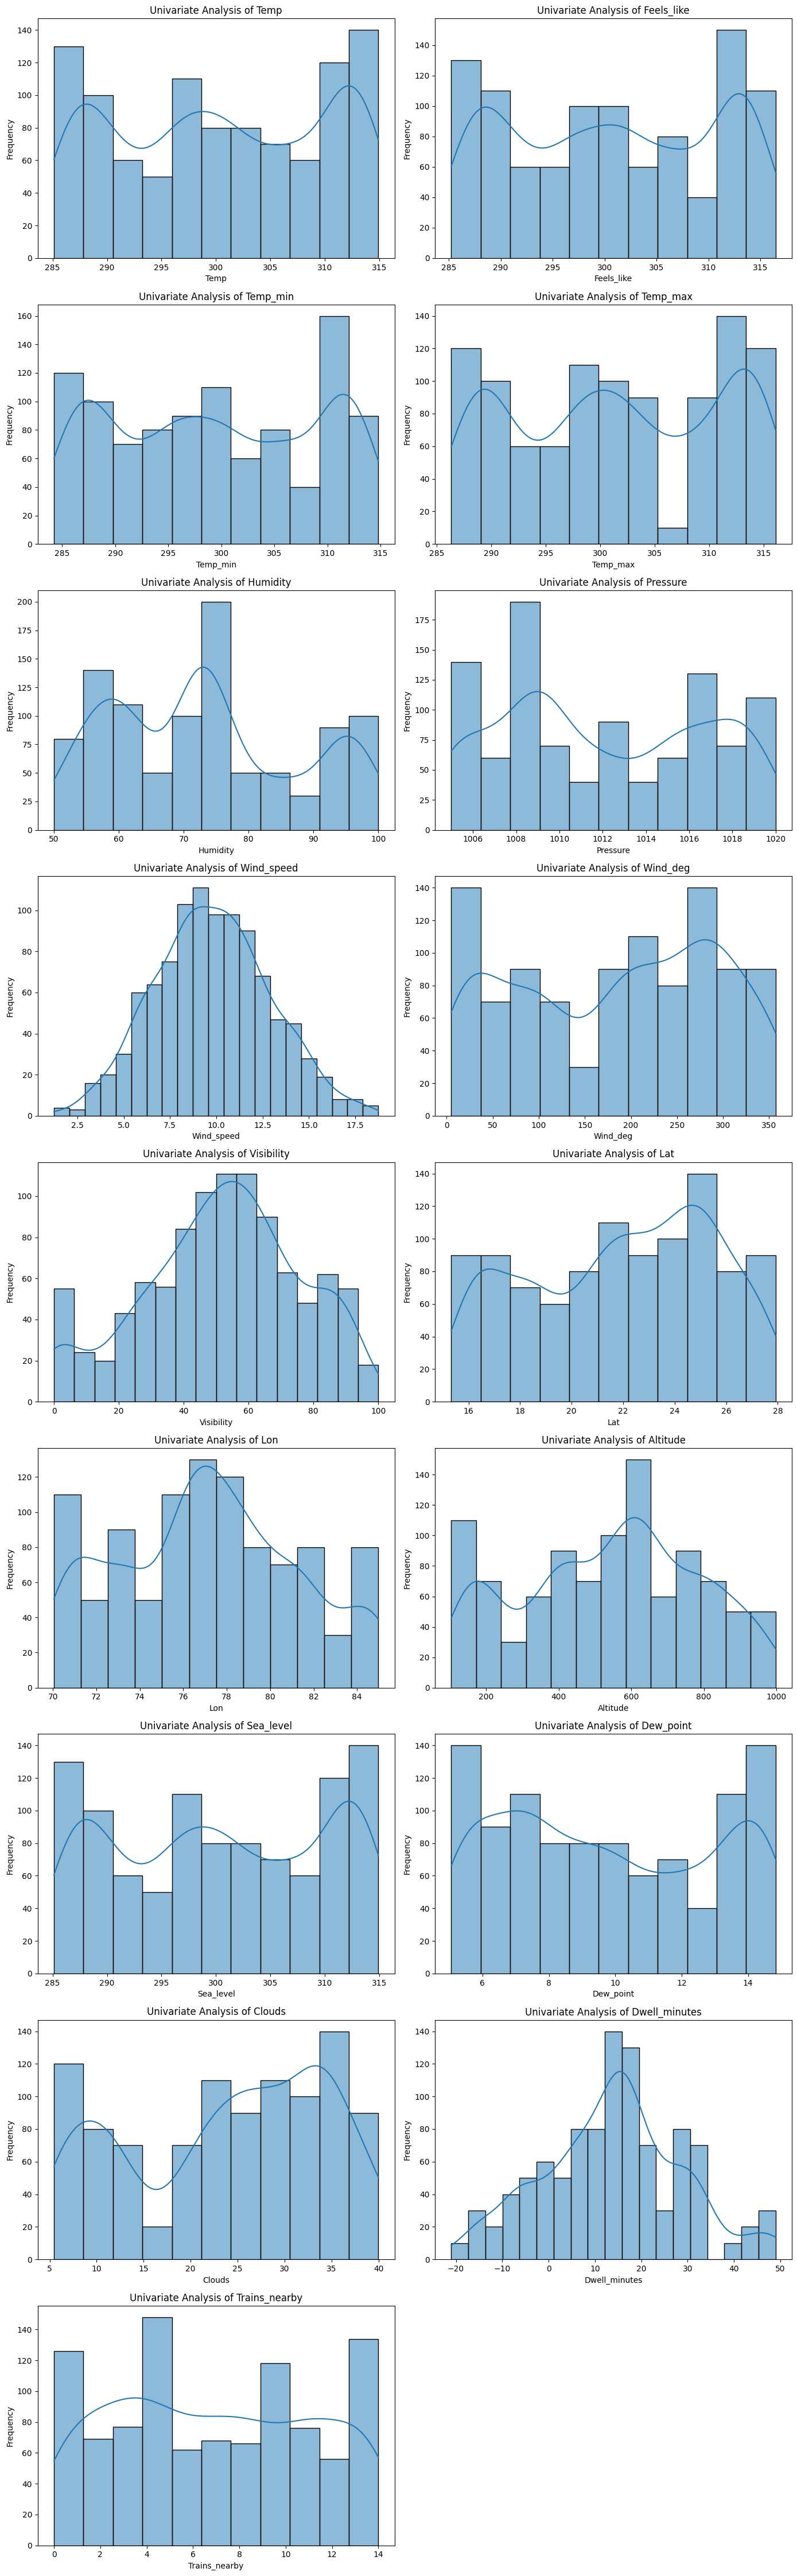

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

n_rows = math.ceil(len(continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for i, col in enumerate(continuous_cols):
    sns.histplot(df_clean2[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Univariate Analysis of {col.capitalize()}')
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_ylabel('Frequency')

# hide unused subplots (if odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Box Plots

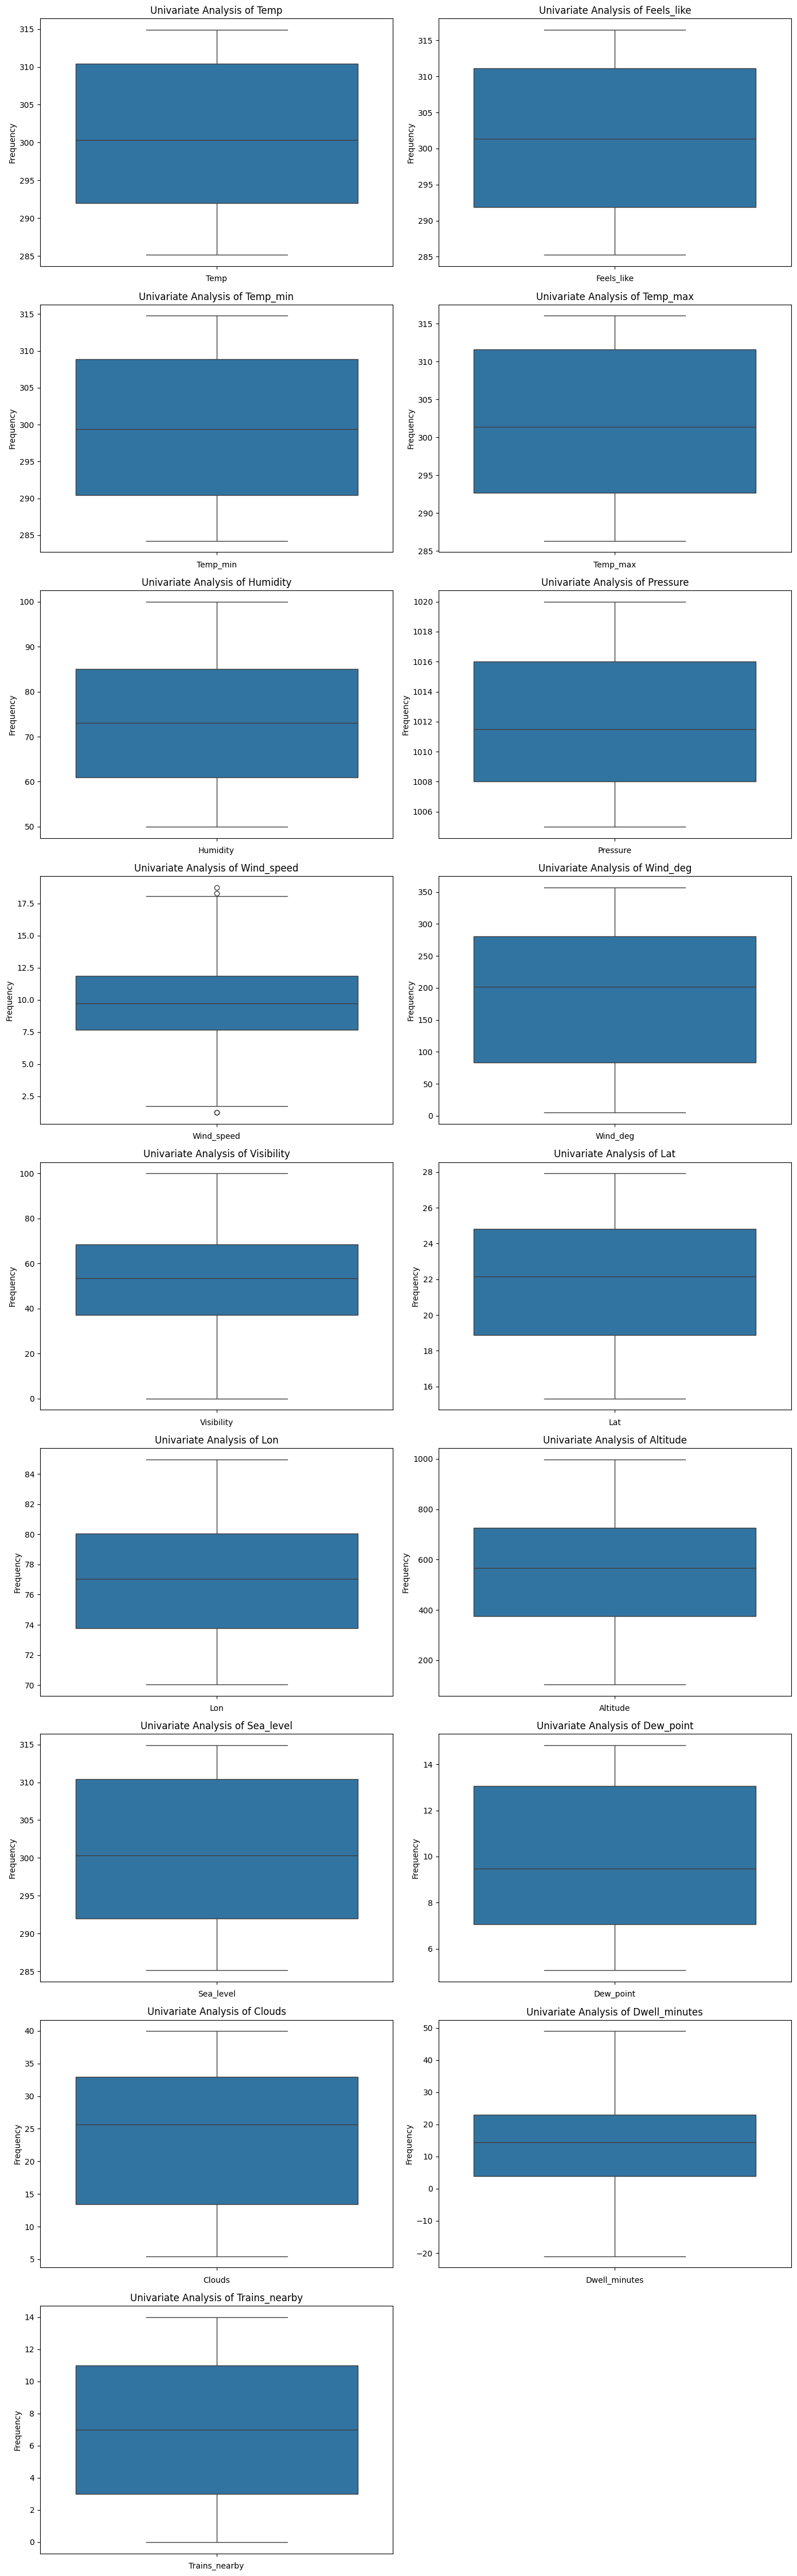

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

n_rows = math.ceil(len(continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()  # flatten in case it's 2D

for i, col in enumerate(continuous_cols):
    sns.boxplot(df_clean2[col], ax=axes[i])
    axes[i].set_title(f'Univariate Analysis of {col.capitalize()}')
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_ylabel('Frequency')

# hide unused subplots (if odd number of columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [24]:
df_clean2[continuous_cols].describe()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,lat,lon,altitude,sea_level,dew_point,clouds,dwell_minutes,trains_nearby
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,300.467600,300.862356,299.452037,301.633285,73.190000,1012.040000,9.786024,184.160000,51.803124,21.925473,77.128913,540.791600,300.467600,9.79860,23.942900,13.680000,6.901000
std,9.486616,9.715476,9.494963,9.442576,14.317083,4.662632,3.118770,108.872253,24.062857,3.558853,4.117502,242.593301,9.486616,3.16522,10.495117,15.049388,4.288308
min,285.130000,285.248923,284.237662,286.322061,50.000000,1005.000000,1.237474,5.000000,0.000000,15.331100,70.042200,104.000000,285.130000,5.06000,5.460000,-21.000000,0.000000
25%,291.950000,291.865859,290.451254,292.697193,61.000000,1008.000000,7.654671,83.750000,37.060478,18.881125,73.771700,375.000000,291.950000,7.06500,13.452500,4.000000,3.000000
50%,300.350000,301.342400,299.353498,301.348407,73.000000,1011.500000,9.734384,201.500000,53.316150,22.160200,77.029950,565.500000,300.350000,9.48500,25.655000,14.500000,7.000000
75%,310.395000,311.115406,308.866861,311.644751,85.000000,1016.000000,11.862670,281.000000,68.428765,24.812375,80.067750,726.000000,310.395000,13.05250,32.930000,23.000000,11.000000
max,314.900000,316.464793,314.775312,316.073184,100.000000,1020.000000,18.741819,357.000000,100.000000,27.919600,84.980500,998.000000,314.900000,14.83000,39.970000,49.000000,14.000000


### There are rows with negative dwell minutes.

In [25]:
neg_dwell = df_clean2.drop([i for i in range(df_clean2.shape[0]) if df_clean2['dwell_minutes'][i] >= 0])
len(neg_dwell)

190

There are 19 such values where the dwell is negative. It is not logically correct, and hence, we will drop these rows

In [26]:
df_clean2 = df_clean2.drop([i for i in range(df_clean2.shape[0]) if df_clean2['dwell_minutes'][i] < 0])

In [27]:
df_clean2[continuous_cols].describe()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,lat,lon,altitude,sea_level,dew_point,clouds,dwell_minutes,trains_nearby
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,300.500617,300.821816,299.511608,301.649043,72.395062,1012.098765,9.577070,175.728395,54.136025,21.910894,77.597465,532.053951,300.500617,9.591852,23.904938,18.864198,6.876543
std,9.666265,9.869010,9.648201,9.664557,13.757281,4.599148,3.178477,109.394108,24.975961,3.607557,3.844857,238.078462,9.666265,3.134027,10.554976,11.442070,4.248122
min,285.130000,285.248923,284.237662,286.322061,50.000000,1005.000000,1.237474,5.000000,0.000000,15.331100,70.136700,106.000000,285.130000,5.060000,5.460000,0.000000,0.000000
25%,291.500000,291.802273,289.829638,291.973261,61.000000,1009.000000,7.242292,81.000000,38.180339,18.758500,75.647200,372.000000,291.500000,7.080000,13.250000,10.000000,3.000000
50%,300.990000,301.353561,299.595551,301.553694,72.000000,1012.000000,9.463680,175.000000,56.761905,22.095700,77.504200,557.000000,300.990000,8.940000,25.650000,17.000000,7.000000
75%,310.270000,311.696051,308.736764,311.602348,80.000000,1016.000000,11.643339,281.000000,72.206134,24.694900,80.416100,713.000000,310.270000,12.470000,32.960000,27.000000,11.000000
max,314.900000,316.464793,314.775312,316.073184,100.000000,1020.000000,18.741819,357.000000,100.000000,27.919600,84.980500,998.000000,314.900000,14.830000,39.970000,49.000000,14.000000


### Non-Continuous Cols

In [28]:
non_continuous_cols = [col for col in df_clean2.columns if col not in continuous_cols]
print(len(non_continuous_cols))
non_continuous_cols

11


['weather_main',
 'day_of_week',
 'origin_code',
 'dest_code',
 'scheduled_arr_time',
 'actual_arr_time',
 'scheduled_dept_time',
 'actual_dept_time',
 'day_of_journey',
 'curr_station_code',
 'tracks_on_route']

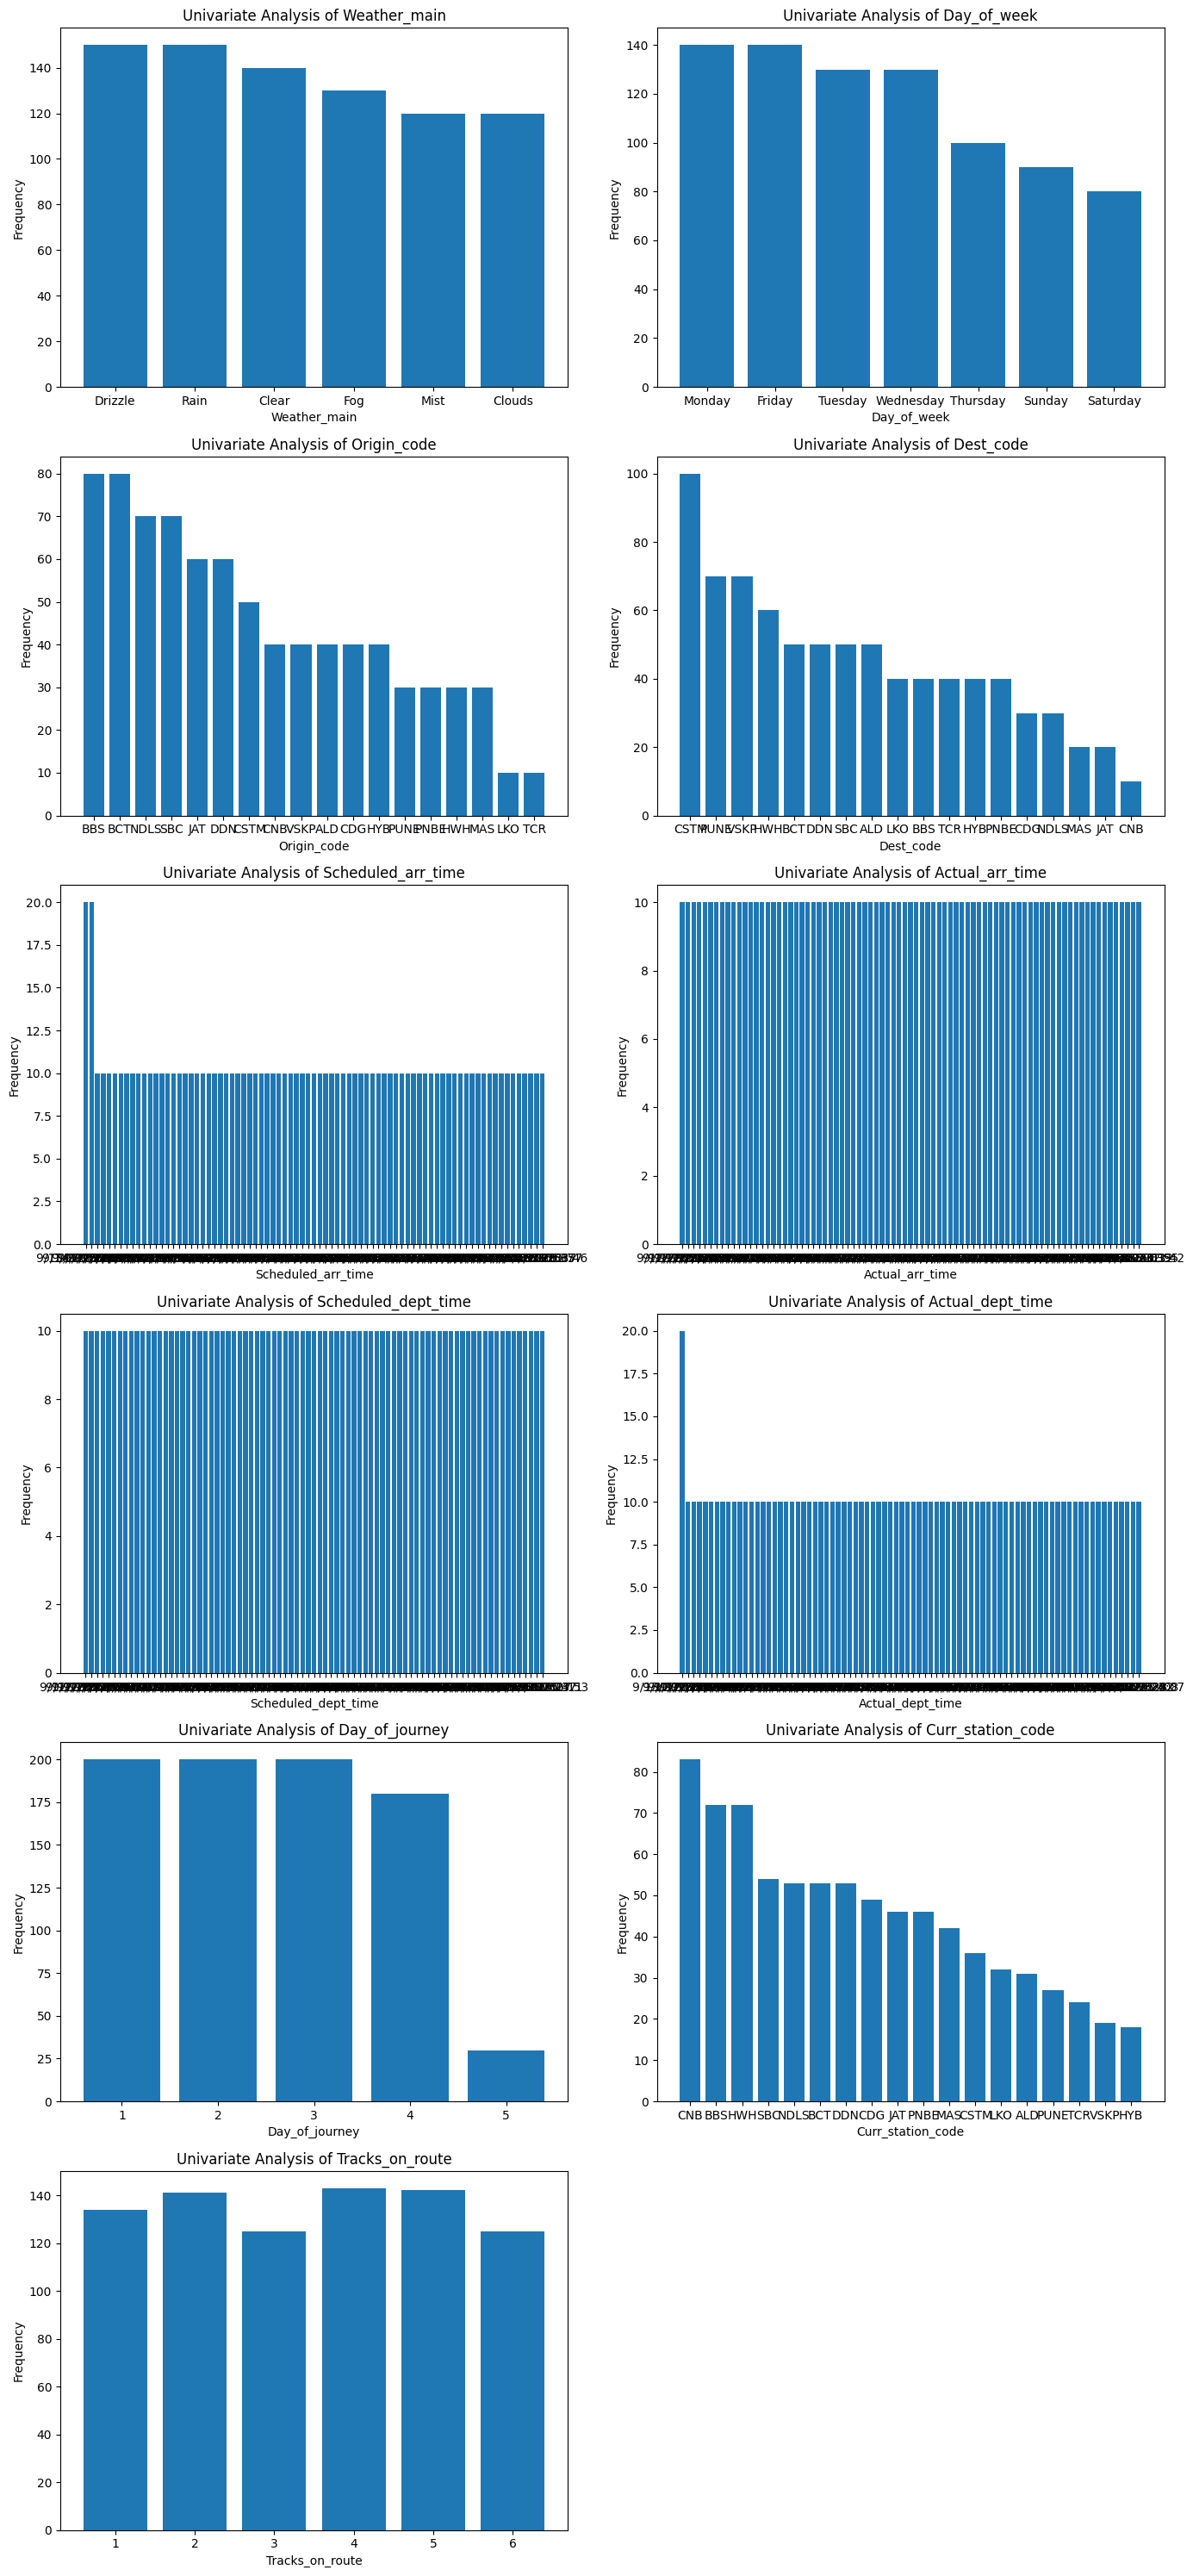

In [29]:
n_rows = math.ceil(len(non_continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(non_continuous_cols):
    axes[i].bar(df_clean2[col].value_counts().index, df_clean2[col].value_counts().values)
    axes[i].set_title(f'Univariate Analysis of {col.capitalize()}')
    axes[i].set_xlabel(f'{col.capitalize()}')
    axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

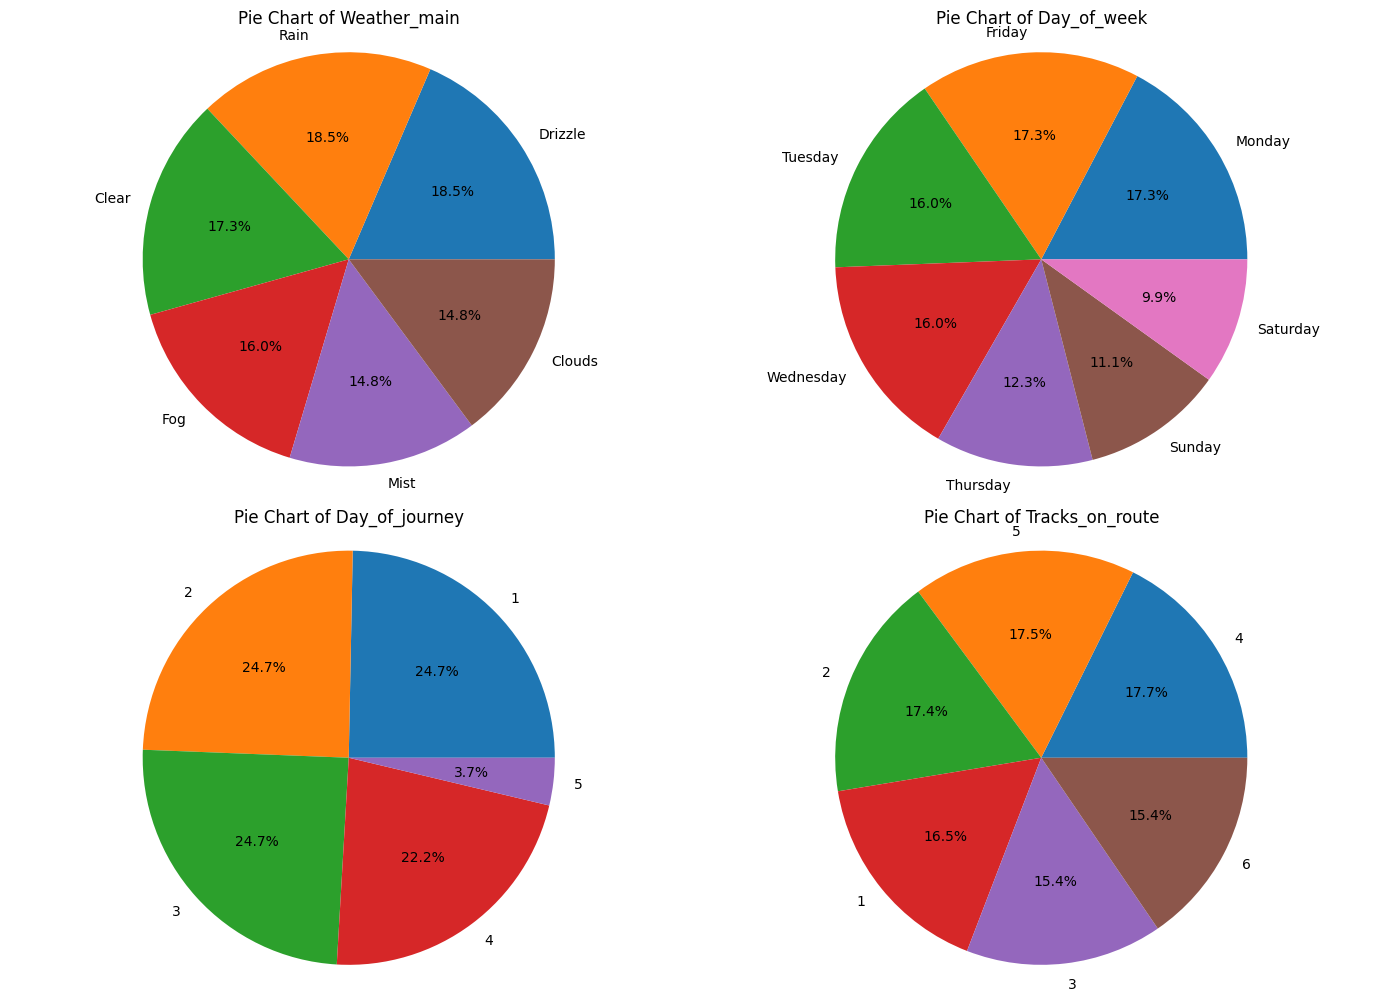

In [30]:
n_rows = math.ceil(len(non_continuous_cols) / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(14, 5 * n_rows))
axes = axes.flatten()

skip_cols = ['scheduled_arr_time', 'scheduled_dept_time', 'origin_code', 'dest_code', 'curr_station_code', 'actual_arr_time', 'actual_dept_time']

plot_idx = 0  # separate index for plotting
for col in non_continuous_cols:
    if col in skip_cols:
        continue  # skip unwanted columns

    counts = df_clean2[col].value_counts()
    axes[plot_idx].pie(counts.values, labels=counts.index, autopct='%1.1f%%')
    axes[plot_idx].set_title(f'Pie Chart of {col.capitalize()}')
    axes[plot_idx].axis('equal')
    plot_idx += 1

# delete unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Feature Engineering

In [31]:
df_clean2.head()

,temp,feels_like,temp_min,temp_max,humidity,pressure,wind_speed,wind_deg,visibility,weather_main,lat,lon,altitude,sea_level,dew_point,clouds,day_of_week,origin_code,dest_code,scheduled_arr_time,actual_arr_time,scheduled_dept_time,actual_dept_time,dwell_minutes,day_of_journey,curr_station_code,tracks_on_route,trains_nearby
0,296.16,295.176594,294.929605,297.341504,52.0,1019,10.098892,351,53.304308,Fog,20.4971,81.5425,998.0,296.16,9.74,34.37,Sunday,JAT,PUNE,9/12/2025 1:09,9/12/2025 1:06,9/12/2025 1:33,9/12/2025 1:55,49,1,JAT,4,5
1,289.63,290.306772,288.772736,289.640032,79.0,1012,6.009852,309,72.436285,Clear,24.5384,82.0181,428.0,289.63,9.92,32.67,Monday,BBS,CSTM,9/12/2025 1:37,9/12/2025 1:33,9/12/2025 1:44,9/12/2025 1:52,19,1,BBS,5,11
2,304.58,305.071829,303.358091,304.816890,100.0,1019,9.114786,277,72.053686,Clear,16.3244,76.9114,726.0,304.58,7.75,30.03,Tuesday,ALD,DDN,9/12/2025 2:03,9/12/2025 2:15,9/12/2025 2:32,9/12/2025 2:30,15,1,ALD,3,4
3,285.89,287.429004,284.237662,287.143537,95.0,1010,5.422360,96,88.931430,Rain,16.0779,75.7695,171.0,285.89,8.90,6.30,Wednesday,PNBE,MAS,9/12/2025 3:57,9/12/2025 3:59,9/12/2025 4:04,9/12/2025 4:07,8,1,PNBE,5,3
4,288.64,288.137026,288.603297,289.273004,86.0,1011,8.414218,118,64.483533,Fog,27.1549,78.5737,807.0,288.64,12.65,35.95,Thursday,VSKP,PUNE,9/12/2025 5:46,9/12/2025 5:49,9/12/2025 6:01,9/12/2025 6:17,28,1,PNBE,5,9


In [32]:
# Convert to datetime first
time_cols = [
    "scheduled_arr_time",
    "scheduled_dept_time",
    "actual_arr_time",
    "actual_dept_time"
]
df_clean2[time_cols] = df_clean2[time_cols].apply(pd.to_datetime, errors='coerce')

# Calculate overall delay
df_clean2["overall_delay_minutes"] = np.where(
    df_clean2["origin_code"] == df_clean2["curr_station_code"],
    (df_clean2["actual_dept_time"] - df_clean2["scheduled_dept_time"]).dt.total_seconds() / 60,
    df_clean2[["actual_arr_time", "scheduled_arr_time", "actual_dept_time", "scheduled_dept_time"]]
    .apply(lambda x: max(
        (x["actual_arr_time"] - x["scheduled_arr_time"]).total_seconds() / 60,
        (x["actual_dept_time"] - x["scheduled_dept_time"]).total_seconds() / 60
    ), axis=1)
)

df_clean2 = df_clean2.drop(['temp_min', 'temp_max', 'origin_code', 'dest_code', 'scheduled_arr_time', 'actual_arr_time', 'scheduled_dept_time', 'actual_dept_time', 'dwell_minutes', 'curr_station_code'], axis = 1)

df_clean2["overall_delay_minutes"] = df_clean2["overall_delay_minutes"].clip(lower=0)


In [33]:
df_clean2.head()

,temp,feels_like,humidity,pressure,wind_speed,wind_deg,visibility,weather_main,lat,lon,altitude,sea_level,dew_point,clouds,day_of_week,day_of_journey,tracks_on_route,trains_nearby,overall_delay_minutes
0,296.16,295.176594,52.0,1019,10.098892,351,53.304308,Fog,20.4971,81.5425,998.0,296.16,9.74,34.37,Sunday,1,4,5,22.0
1,289.63,290.306772,79.0,1012,6.009852,309,72.436285,Clear,24.5384,82.0181,428.0,289.63,9.92,32.67,Monday,1,5,11,8.0
2,304.58,305.071829,100.0,1019,9.114786,277,72.053686,Clear,16.3244,76.9114,726.0,304.58,7.75,30.03,Tuesday,1,3,4,0.0
3,285.89,287.429004,95.0,1010,5.422360,96,88.931430,Rain,16.0779,75.7695,171.0,285.89,8.90,6.30,Wednesday,1,5,3,3.0
4,288.64,288.137026,86.0,1011,8.414218,118,64.483533,Fog,27.1549,78.5737,807.0,288.64,12.65,35.95,Thursday,1,5,9,16.0


Datetime conversion:
All scheduled and actual time columns are converted from strings to datetime so that time differences can be computed.

Origin station logic:
If the current station is the same as the origin, the delay is calculated only from the difference between actual and scheduled departure times.

Intermediate station logic:
For other stations, both arrival and departure delays are computed, and the larger of the two is taken as the overall delay at that station.

Unit conversion:
Time differences are converted from seconds to minutes.

Cleanup:
Negative values (early departures or arrivals) are replaced with zero using .clip(lower=0).

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline

df = df_clean2.copy()

# Encode categorical features
cat_cols = ["weather_main", "day_of_week"]
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=["overall_delay_minutes"])
y = df["overall_delay_minutes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def evaluate(model, X_t, y_t, name):
    preds = model.predict(X_t)
    return {
        "Model": name,
        "MAE": mean_absolute_error(y_t, preds),
        "RMSE": np.sqrt(mean_squared_error(y_t, preds)),
        "R2": r2_score(y_t, preds)
    }

results = []

# Linear models
linear_models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

linear_params = {
    "Ridge": {"model__alpha": [0.1, 1.0, 10.0]},
    "Lasso": {"model__alpha": [0.0001, 0.001, 0.01, 0.1]},
}

print("=== Running Linear Models ===\n")
for name, model in linear_models.items():
    print(f">> Training {name} ...")
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])
    
    if name in linear_params:
        grid = GridSearchCV(pipe, linear_params[name], cv=5, scoring="neg_mean_absolute_error")
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best Params for {name}: {grid.best_params_}")
    else:
        best_model = pipe.fit(X_train, y_train)
        print(f"No hyperparameter tuning for {name}")
    
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring="r2").mean()
    res = evaluate(best_model, X_test, y_test, name)
    res["CV_R2"] = cv_score
    results.append(res)

    print(f"Metrics for {name}: MAE={res['MAE']:.3f}, RMSE={res['RMSE']:.3f}, R2={res['R2']:.3f}, CV_R2={cv_score:.3f}\n")

# Tree-based models
tree_models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

tree_params = {
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [5, 10, None]},
    "Gradient Boosting": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]},
    "XGBoost": {"n_estimators": [100, 300], "learning_rate": [0.05, 0.1], "max_depth": [3, 5, 7]}
}

print("\n=== Running Tree-Based Models ===\n")
for name, model in tree_models.items():
    print(f">> Training {name} ...")
    grid = GridSearchCV(model, tree_params[name], cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    print(f"Best Params for {name}: {grid.best_params_}")
    
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring="r2").mean()
    res = evaluate(best_model, X_test, y_test, name)
    res["CV_R2"] = cv_score
    results.append(res)

    print(f"Metrics for {name}: MAE={res['MAE']:.3f}, RMSE={res['RMSE']:.3f}, R2={res['R2']:.3f}, CV_R2={cv_score:.3f}\n")

# Summary
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n=== Model Performance Summary (with Cross-Validation) ===\n")
print(results_df.round(3))


# Combine RMSE and CV_R2 to choose the best model
# Higher CV_R2 is better, lower RMSE is better
results_df["score"] = results_df["CV_R2"] - (results_df["RMSE"] / results_df["RMSE"].max())

# Pick model with highest combined score
best_model_name = results_df.loc[results_df["score"].idxmax(), "Model"]
print("\n=== Model Selection Summary ===")
print(results_df[["Model", "MAE", "RMSE", "R2", "CV_R2", "score"]].round(3))
print(f"\n=== Best Model Selected: {best_model_name} ===")

# Retrain the best model on the full dataset (X, y)
if best_model_name == "Linear Regression":
    final_model = Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]).fit(X, y)

elif best_model_name == "Ridge":
    final_model = Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]).fit(X, y)

elif best_model_name == "Lasso":
    final_model = Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.01))
    ]).fit(X, y)

elif best_model_name == "Random Forest":
    final_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        random_state=42
    ).fit(X, y)

elif best_model_name == "Gradient Boosting":
    final_model = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        random_state=42
    ).fit(X, y)

elif best_model_name == "XGBoost":
    final_model = XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        verbosity=0
    ).fit(X, y)

else:
    raise ValueError(f"Unknown model: {best_model_name}")

print("Final model trained successfully and ready for use.")


=== Running Linear Models ===

>> Training Linear Regression ...
No hyperparameter tuning for Linear Regression
Metrics for Linear Regression: MAE=3.547, RMSE=4.465, R2=0.695, CV_R2=0.689

>> Training Ridge ...
Best Params for Ridge: {'model__alpha': 1.0}
Metrics for Ridge: MAE=3.550, RMSE=4.464, R2=0.695, CV_R2=0.689

>> Training Lasso ...
Best Params for Lasso: {'model__alpha': 0.1}
Metrics for Lasso: MAE=3.528, RMSE=4.517, R2=0.688, CV_R2=0.682


=== Running Tree-Based Models ===

>> Training Random Forest ...
Best Params for Random Forest: {'max_depth': None, 'n_estimators': 200}
Metrics for Random Forest: MAE=0.686, RMSE=1.690, R2=0.956, CV_R2=0.938

>> Training Gradient Boosting ...
Best Params for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}
Metrics for Gradient Boosting: MAE=1.088, RMSE=1.870, R2=0.947, CV_R2=0.948

>> Training XGBoost ...
Best Params for XGBoost: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}
Metrics for XGBoost: MAE=0.716, RMSE

# Checking on a new Train Data based on it's schedule

## Import Open-Meteo Client for Weather Forecasts

In [44]:
import pandas as pd
from datetime import timedelta
import openmeteo_requests
import requests_cache
from retry_requests import retry

# Open-Meteo client with caching and retry
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

## Define Weather Fetch Function

In [45]:
def get_weather_15min_for_station(lat, lon, time):
    """Fetch 15-minute weather data for the given station and timestamp."""
    try:
        url = "https://api.open-meteo.com/v1/forecast"
        params = {
            "latitude": lat,
            "longitude": lon,
            "minutely_15": [
                "temperature_2m", "apparent_temperature", "relative_humidity_2m",
                "pressure_msl", "windspeed_10m", "winddirection_10m",
                "visibility", "cloudcover", "dew_point_2m", "weathercode"
            ],
            "timezone": "auto"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]
        minutely_15 = response.Minutely15()

        df = pd.DataFrame({
            "time": pd.date_range(
                start=pd.to_datetime(minutely_15.Time(), unit="s", utc=True),
                end=pd.to_datetime(minutely_15.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=minutely_15.Interval()),
                inclusive="left"
            ),
            "temp": minutely_15.Variables(0).ValuesAsNumpy(),
            "feels_like": minutely_15.Variables(1).ValuesAsNumpy(),
            "humidity": minutely_15.Variables(2).ValuesAsNumpy(),
            "pressure": minutely_15.Variables(3).ValuesAsNumpy(),
            "wind_speed": minutely_15.Variables(4).ValuesAsNumpy(),
            "wind_deg": minutely_15.Variables(5).ValuesAsNumpy(),
            "visibility": minutely_15.Variables(6).ValuesAsNumpy(),
            "clouds": minutely_15.Variables(7).ValuesAsNumpy(),
            "dew_point": minutely_15.Variables(8).ValuesAsNumpy(),
            "weather_code": minutely_15.Variables(9).ValuesAsNumpy(),
        })

        df["time"] = df["time"].dt.tz_convert("Asia/Kolkata")
        scheduled_time = pd.to_datetime(time).tz_localize("Asia/Kolkata")

        row = df.iloc[(df["time"] - scheduled_time).abs().argsort()[:1]].copy()

        def classify_weather(code: int) -> str:
            if code in [0, 1]:
                return "Clear"
            elif code in [2, 3]:
                return "Clouds"
            elif code in [45, 48]:
                return "Fog"
            elif code in [51, 53, 55]:
                return "Drizzle"
            elif code in [61, 63, 65, 80, 81, 82, 95, 96, 99]:
                return "Rain"
            elif code in [56, 57]:
                return "Mist"
            else:
                return "Clear"

        row["weather_main"] = row["weather_code"].apply(classify_weather)
        row.drop(columns=["weather_code"], inplace=True)
        row["sea_level"] = row["pressure"]

        return row.iloc[0].to_dict()

    except Exception as e:
        print(f"Weather fetch failed for {lat},{lon}: {e}")
        return None

## Define Train Schedule

In [46]:
train_schedule = pd.DataFrame({
    "station_code": ["DBRG", "NTSK", "DMV", "LKA", "GHY", "NJP", "KIR", "BJU", 
                     "MGS", "ALD", "BPL", "NGP", "WR", "BSL", "MMR", "KYN", "BVI", "MMCT"],
    "station_name": ["Dibrugarh", "New Tinsukia", "Dimapur", "Lanka", "Guwahati", "New Jalpaiguri",
                     "Katihar Jn", "Barauni Jn", "Mughalsarai Jn", "Prayagraj Jn", "Bhopal Jn",
                     "Nagpur", "Wardha Jn", "Bhusaval Jn", "Manmad Jn", "Kalyan Jn",
                     "Borivali", "Mumbai Central"],
    "lat": [27.4728, 27.4922, 25.9117, 26.4333, 26.1445, 26.6896, 25.5385, 25.4175,
            25.2760, 25.4485, 23.2599, 21.1458, 20.7453, 21.0455, 20.2565, 19.2437, 19.2354, 18.9696],
    "lon": [94.9120, 95.3556, 93.7193, 93.3833, 91.7362, 88.4304, 87.5706, 85.9739,
            83.1190, 81.8484, 77.4126, 79.0882, 78.6021, 75.7860, 74.4426, 73.1362, 72.8540, 72.8194],
    "altitude": [108, 120, 140, 150, 55, 114, 36, 52, 76, 98, 523, 310, 287, 182, 243, 20, 15, 14],
    "day_of_week": ["Tuesday"] * 18,
    "day_of_journey": [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
    "tracks_on_route": [2, 2, 1, 1, 3, 3, 2, 4, 4, 4, 3, 2, 2, 3, 3, 4, 4, 4],
    "trains_nearby": [3, 2, 1, 2, 5, 6, 4, 6, 8, 7, 6, 5, 4, 5, 6, 8, 9, 10],
    "scheduled_arrival": [None, "2025-11-04 05:10", "2025-11-04 07:15", "2025-11-04 09:40", "2025-11-04 12:10",
                          "2025-11-04 19:30", "2025-11-04 22:10", "2025-11-05 03:30", "2025-11-05 08:00",
                          "2025-11-05 10:45", "2025-11-05 18:20", "2025-11-05 22:45", "2025-11-06 01:00",
                          "2025-11-06 03:30", "2025-11-06 06:20", "2025-11-06 09:15", "2025-11-06 10:30", "2025-11-06 11:45"]
})
display(train_schedule)

,station_code,station_name,lat,lon,altitude,day_of_week,day_of_journey,tracks_on_route,trains_nearby,scheduled_arrival
0,DBRG,Dibrugarh,27.4728,94.9120,108,Tuesday,1,2,3,None
1,NTSK,New Tinsukia,27.4922,95.3556,120,Tuesday,1,2,2,2025-11-04 05:10
2,DMV,Dimapur,25.9117,93.7193,140,Tuesday,1,1,1,2025-11-04 07:15
3,LKA,Lanka,26.4333,93.3833,150,Tuesday,1,1,2,2025-11-04 09:40
4,GHY,Guwahati,26.1445,91.7362,55,Tuesday,1,3,5,2025-11-04 12:10
5,NJP,New Jalpaiguri,26.6896,88.4304,114,Tuesday,1,3,6,2025-11-04 19:30
6,KIR,Katihar Jn,25.5385,87.5706,36,Tuesday,1,2,4,2025-11-04 22:10
7,BJU,Barauni Jn,25.4175,85.9739,52,Tuesday,2,4,6,2025-11-05 03:30
8,MGS,Mughalsarai Jn,25.2760,83.1190,76,Tuesday,2,4,8,2025-11-05 08:00
9,ALD,Prayagraj Jn,25.4485,81.8484,98,Tuesday,2,4,7,2025-11-05 10:45


## Predict Weather + Delay Sequentially

In [54]:
weather_records = []
cumulative_delay = 0

for i, row in train_schedule.iterrows():
    if i == 0:
        continue

    sched_arr = pd.to_datetime(row["scheduled_arrival"])
    lat, lon = row["lat"], row["lon"]

    # Use scheduled time + cumulative delay for weather fetch
    forecast_time = sched_arr + timedelta(minutes=cumulative_delay)

    print(f"\n--- Station {i} ---")
    print(f"Scheduled arrival: {sched_arr}")
    print(f"Fetching weather for time: {forecast_time}")

    forecast = get_weather_15min_for_station(lat, lon, forecast_time)
    if forecast is None:
        print("No forecast data found, skipping...")
        continue

    weather_row = {**row, **forecast}

    # --- Prepare features for delay prediction ---
    X_row = pd.DataFrame([{
        'temp': forecast['temp'] + 273.15,
        'feels_like': forecast['feels_like'] + 273.15,
        'humidity': forecast['humidity'],
        'pressure': forecast['pressure'],
        'wind_speed': forecast['wind_speed'],
        'wind_deg': forecast['wind_deg'],
        'visibility': forecast['visibility'],
        'clouds': forecast['clouds'],
        'dew_point': forecast['dew_point'] + 273.15,
        'weather_main': forecast['weather_main'],
        'lat': lat,
        'lon': lon,
        'altitude': row['altitude'],
        'sea_level': forecast['sea_level'],
        'day_of_week': row['day_of_week'],
        'day_of_journey': row['day_of_journey'],
        'tracks_on_route': row['tracks_on_route'],
        'trains_nearby': row['trains_nearby']
    }])

    for col in X_row.columns:
        if col in le_dict:
            X_row[col] = X_row[col].astype(str).apply(
                lambda x: le_dict[col].transform([x])[0] if x in le_dict[col].classes_ else -1
            )

    X_row = X_row.reindex(columns=final_model.feature_names_in_, fill_value=0)

    delay_pred = float(final_model.predict(X_row)[0])
    cumulative_delay += delay_pred
    actual_arr = sched_arr + timedelta(minutes=cumulative_delay)

    print(f"Predicted delay: {delay_pred:.2f} min | Cumulative delay: {cumulative_delay:.2f} min")
    print(f"Predicted actual arrival: {actual_arr}")

    weather_row["predicted_delay"] = delay_pred
    weather_row["cumulative_delay"] = cumulative_delay
    weather_row["actual_arrival_predicted"] = actual_arr
    weather_records.append(weather_row)

weather_df = pd.DataFrame(weather_records)



--- Station 1 ---
Scheduled arrival: 2025-11-04 05:10:00
Fetching weather for time: 2025-11-04 05:10:00
Predicted delay: 7.08 min | Cumulative delay: 7.08 min
Predicted actual arrival: 2025-11-04 05:17:04.500000

--- Station 2 ---
Scheduled arrival: 2025-11-04 07:15:00
Fetching weather for time: 2025-11-04 07:22:04.500000
Predicted delay: 8.92 min | Cumulative delay: 16.00 min
Predicted actual arrival: 2025-11-04 07:30:59.700000

--- Station 3 ---
Scheduled arrival: 2025-11-04 09:40:00
Fetching weather for time: 2025-11-04 09:55:59.700000
Predicted delay: 9.04 min | Cumulative delay: 25.04 min
Predicted actual arrival: 2025-11-04 10:05:02.400000

--- Station 4 ---
Scheduled arrival: 2025-11-04 12:10:00
Fetching weather for time: 2025-11-04 12:35:02.400000
Predicted delay: 9.03 min | Cumulative delay: 34.06 min
Predicted actual arrival: 2025-11-04 12:44:03.900000

--- Station 5 ---
Scheduled arrival: 2025-11-04 19:30:00
Fetching weather for time: 2025-11-04 20:04:03.900000
Predicted de

## Final Output

In [60]:
pd.set_option('display.max_columns', None)
display(weather_df)
total_delay = weather_df['cumulative_delay'][len(weather_df)-1]

print('Total Delay at original time=', total_delay)

,station_code,station_name,lat,lon,altitude,day_of_week,day_of_journey,tracks_on_route,trains_nearby,scheduled_arrival,time,temp,feels_like,humidity,pressure,wind_speed,wind_deg,visibility,clouds,dew_point,weather_main,sea_level,predicted_delay,cumulative_delay,actual_arrival_predicted
0,NTSK,New Tinsukia,27.4922,95.3556,120,Tuesday,1,2,2,2025-11-04 05:10,2025-11-04 05:15:00+05:30,21.650000,25.883909,100.0,1009.799988,3.415260,71.564964,24140.0,79.0,21.649998,Fog,1009.799988,7.075,7.075,2025-11-04 05:17:04.500
1,DMV,Dimapur,25.9117,93.7193,140,Tuesday,1,1,1,2025-11-04 07:15,2025-11-04 07:15:00+05:30,23.400000,28.005196,93.0,1011.299988,2.968636,75.963730,24140.0,89.0,22.202713,Clouds,1011.299988,8.920,15.995,2025-11-04 07:30:59.700
2,LKA,Lanka,26.4333,93.3833,150,Tuesday,1,1,2,2025-11-04 09:40,2025-11-04 10:00:00+05:30,28.750000,33.392136,66.0,1010.299988,4.553679,18.435053,24140.0,57.0,21.768549,Clouds,1010.299988,9.045,25.040,2025-11-04 10:05:02.400
3,GHY,Guwahati,26.1445,91.7362,55,Tuesday,1,3,5,2025-11-04 12:10,2025-11-04 12:30:00+05:30,30.600000,35.432434,66.0,1007.599976,11.592894,53.841728,24140.0,55.0,23.524420,Clouds,1007.599976,9.025,34.065,2025-11-04 12:44:03.900
4,NJP,New Jalpaiguri,26.6896,88.4304,114,Tuesday,1,3,6,2025-11-04 19:30,2025-11-04 20:00:00+05:30,22.000000,22.893196,68.0,1010.200012,7.517021,343.300690,24140.0,0.0,15.822942,Clear,1010.200012,3.525,37.590,2025-11-04 20:07:35.400
5,KIR,Katihar Jn,25.5385,87.5706,36,Tuesday,1,2,4,2025-11-04 22:10,2025-11-04 22:45:00+05:30,22.200001,25.650326,91.0,1009.099976,5.154415,294.775116,24140.0,42.0,20.660065,Clouds,1009.099976,6.565,44.155,2025-11-04 22:54:09.300
6,BJU,Barauni Jn,25.4175,85.9739,52,Tuesday,2,4,6,2025-11-05 03:30,2025-11-05 04:15:00+05:30,20.700001,23.731236,94.0,1007.000000,4.693826,237.528824,24140.0,24.0,19.699049,Clear,1007.000000,6.615,50.770,2025-11-05 04:20:46.200
7,MGS,Mughalsarai Jn,25.2760,83.1190,76,Tuesday,2,4,8,2025-11-05 08:00,2025-11-05 08:45:00+05:30,23.900000,26.900587,73.0,1010.200012,1.800000,233.130020,24140.0,35.0,18.765512,Clear,1010.200012,6.440,57.210,2025-11-05 08:57:12.600
8,ALD,Prayagraj Jn,25.4485,81.8484,98,Tuesday,2,4,7,2025-11-05 10:45,2025-11-05 11:45:00+05:30,29.100000,32.266232,50.0,1008.700012,4.553679,251.564957,24140.0,30.0,17.621433,Clear,1008.700012,6.600,63.810,2025-11-05 11:48:48.600
9,BPL,Bhopal Jn,23.2599,77.4126,523,Tuesday,2,3,6,2025-11-05 18:20,2025-11-05 19:30:00+05:30,22.799999,23.864038,62.0,1011.599976,4.510787,331.389618,24140.0,29.0,15.140553,Clear,1011.599976,3.030,66.840,2025-11-05 19:26:50.400


Total Delay at original time= 103.75499999999998


# 15 Minutely Predictions

## Define Base Variables

In [73]:
from datetime import timedelta
import pandas as pd

# Define interval and range
interval = timedelta(minutes=15)
total_shift_duration = timedelta(hours=4)

# Use the first non-null scheduled_arrival as the base time
base_start_time = pd.to_datetime(train_schedule["scheduled_arrival"].dropna().iloc[0])

# Generate all possible shifted start times (every 15 minutes for 4 hours)
num_intervals = int(total_shift_duration.total_seconds() // interval.total_seconds())
shift_times = [base_start_time + i * interval for i in range(num_intervals + 1)]

print(f"Generated {len(shift_times)} alternative schedules:")
for t in shift_times:
    print(t)


Generated 17 alternative schedules:
2025-11-04 05:10:00
2025-11-04 05:25:00
2025-11-04 05:40:00
2025-11-04 05:55:00
2025-11-04 06:10:00
2025-11-04 06:25:00
2025-11-04 06:40:00
2025-11-04 06:55:00
2025-11-04 07:10:00
2025-11-04 07:25:00
2025-11-04 07:40:00
2025-11-04 07:55:00
2025-11-04 08:10:00
2025-11-04 08:25:00
2025-11-04 08:40:00
2025-11-04 08:55:00
2025-11-04 09:10:00


## Generate shifted schedules

In [77]:
from datetime import timedelta
import pandas as pd

# Interval and total duration
interval = timedelta(minutes=15)
total_shift_duration = timedelta(hours=4)

# Base start time — use the first non-null scheduled_arrival
base_start_time = pd.to_datetime(train_schedule["scheduled_arrival"].dropna().iloc[0])

# Generate shift timestamps
shift_times = [base_start_time + i * interval for i in range(int(total_shift_duration / interval) + 1)]

# Store all shifted schedules
alt_schedules = []

for shift_time in shift_times:
    shift_minutes = (shift_time - base_start_time).total_seconds() / 60
    shifted_schedule = train_schedule.copy()

    # Shift all scheduled_arrival times
    shifted_schedule["scheduled_arrival_shifted"] = pd.to_datetime(
        shifted_schedule["scheduled_arrival"]
    ) + timedelta(minutes=shift_minutes)

    # Store this variant's start time
    shifted_schedule["start_time_variant"] = shift_time

    alt_schedules.append(shifted_schedule)

#  Preview first 3 shifted schedules
for i, alt_schedule in enumerate(alt_schedules[:3], start=1):
    print(f"--- Shift {i}: Start Time {alt_schedule['start_time_variant'].iloc[0]} ---")
    display(alt_schedule.head(), "\n")


--- Shift 1: Start Time 2025-11-04 05:10:00 ---


,station_code,station_name,lat,lon,altitude,day_of_week,day_of_journey,tracks_on_route,trains_nearby,scheduled_arrival,scheduled_arrival_shifted,start_time_variant
0,DBRG,Dibrugarh,27.4728,94.9120,108,Tuesday,1,2,3,None,NaT,2025-11-04 05:10:00
1,NTSK,New Tinsukia,27.4922,95.3556,120,Tuesday,1,2,2,2025-11-04 05:10,2025-11-04 05:10:00,2025-11-04 05:10:00
2,DMV,Dimapur,25.9117,93.7193,140,Tuesday,1,1,1,2025-11-04 07:15,2025-11-04 07:15:00,2025-11-04 05:10:00
3,LKA,Lanka,26.4333,93.3833,150,Tuesday,1,1,2,2025-11-04 09:40,2025-11-04 09:40:00,2025-11-04 05:10:00
4,GHY,Guwahati,26.1445,91.7362,55,Tuesday,1,3,5,2025-11-04 12:10,2025-11-04 12:10:00,2025-11-04 05:10:00


'\n'

--- Shift 2: Start Time 2025-11-04 05:25:00 ---


,station_code,station_name,lat,lon,altitude,day_of_week,day_of_journey,tracks_on_route,trains_nearby,scheduled_arrival,scheduled_arrival_shifted,start_time_variant
0,DBRG,Dibrugarh,27.4728,94.9120,108,Tuesday,1,2,3,None,NaT,2025-11-04 05:25:00
1,NTSK,New Tinsukia,27.4922,95.3556,120,Tuesday,1,2,2,2025-11-04 05:10,2025-11-04 05:25:00,2025-11-04 05:25:00
2,DMV,Dimapur,25.9117,93.7193,140,Tuesday,1,1,1,2025-11-04 07:15,2025-11-04 07:30:00,2025-11-04 05:25:00
3,LKA,Lanka,26.4333,93.3833,150,Tuesday,1,1,2,2025-11-04 09:40,2025-11-04 09:55:00,2025-11-04 05:25:00
4,GHY,Guwahati,26.1445,91.7362,55,Tuesday,1,3,5,2025-11-04 12:10,2025-11-04 12:25:00,2025-11-04 05:25:00


'\n'

--- Shift 3: Start Time 2025-11-04 05:40:00 ---


,station_code,station_name,lat,lon,altitude,day_of_week,day_of_journey,tracks_on_route,trains_nearby,scheduled_arrival,scheduled_arrival_shifted,start_time_variant
0,DBRG,Dibrugarh,27.4728,94.9120,108,Tuesday,1,2,3,None,NaT,2025-11-04 05:40:00
1,NTSK,New Tinsukia,27.4922,95.3556,120,Tuesday,1,2,2,2025-11-04 05:10,2025-11-04 05:40:00,2025-11-04 05:40:00
2,DMV,Dimapur,25.9117,93.7193,140,Tuesday,1,1,1,2025-11-04 07:15,2025-11-04 07:45:00,2025-11-04 05:40:00
3,LKA,Lanka,26.4333,93.3833,150,Tuesday,1,1,2,2025-11-04 09:40,2025-11-04 10:10:00,2025-11-04 05:40:00
4,GHY,Guwahati,26.1445,91.7362,55,Tuesday,1,3,5,2025-11-04 12:10,2025-11-04 12:40:00,2025-11-04 05:40:00


'\n'

## Run delay prediction loop for each shifted schedule

In [79]:
sim_results = []

for idx, shifted_schedule in enumerate(alt_schedules, start=1):
    # Use the shifted arrival time of the first valid station as the start time variant
    start_time_variant = pd.to_datetime(
        shifted_schedule["scheduled_arrival_shifted"].dropna().iloc[0]
    )

    print("\n" + "=" * 60)
    print(f"Simulating Schedule Variant {idx}")
    print(f"Start Time: {start_time_variant}")
    print("=" * 60)

    weather_records_sim = []
    cumulative_delay = 0

    for i, row in shifted_schedule.iterrows():
        # Skip if no valid arrival time (e.g., origin station)
        if pd.isna(row["scheduled_arrival_shifted"]):
            continue

        sched_arr = pd.to_datetime(row["scheduled_arrival_shifted"])
        lat, lon = row["lat"], row["lon"]

        # Adjust forecast time based on cumulative delay
        forecast_time = sched_arr + timedelta(minutes=cumulative_delay)
        forecast = get_weather_15min_for_station(lat, lon, forecast_time)

        if forecast is None:
            print(f"No weather data for station index {i} at {forecast_time}")
            continue

        # Prepare model input
        X_row = pd.DataFrame([{
            'temp': forecast['temp'] + 273.15,
            'feels_like': forecast['feels_like'] + 273.15,
            'humidity': forecast['humidity'],
            'pressure': forecast['pressure'],
            'wind_speed': forecast['wind_speed'],
            'wind_deg': forecast['wind_deg'],
            'visibility': forecast['visibility'],
            'clouds': forecast['clouds'],
            'dew_point': forecast['dew_point'] + 273.15,
            'weather_main': forecast['weather_main'],
            'lat': lat,
            'lon': lon,
            'altitude': row['altitude'],
            'sea_level': forecast['sea_level'],
            'day_of_week': row['day_of_week'],
            'day_of_journey': row['day_of_journey'],
            'tracks_on_route': row['tracks_on_route'],
            'trains_nearby': row['trains_nearby']
        }])

        # Encode categorical columns if applicable
        for col in X_row.columns:
            if col in le_dict:
                X_row[col] = X_row[col].astype(str).apply(
                    lambda x: le_dict[col].transform([x])[0] if x in le_dict[col].classes_ else -1
                )

        # Align columns with model expectations
        X_row = X_row.reindex(columns=final_model.feature_names_in_, fill_value=0)

        # Predict and accumulate delay
        delay_pred = float(final_model.predict(X_row)[0])
        cumulative_delay += delay_pred
        actual_arr = sched_arr + timedelta(minutes=cumulative_delay)

        # Record each step
        weather_records_sim.append({
            "station_index": i,
            "scheduled_arrival_shifted": sched_arr,
            "forecast_time": forecast_time,
            "predicted_delay": delay_pred,
            "cumulative_delay": cumulative_delay,
            "actual_arrival_predicted": actual_arr,
            "start_time_variant": start_time_variant
        })

        print(f"Station {i}: Predicted Delay = {delay_pred:.2f} min | "
              f"Cumulative = {cumulative_delay:.2f} min | ETA = {actual_arr.strftime('%H:%M')}")

    # Convert to DataFrame for this variant
    sim_df = pd.DataFrame(weather_records_sim)
    total_delay_sim = sim_df["cumulative_delay"].iloc[-1] if not sim_df.empty else None

    sim_results.append({
        "start_time_variant": start_time_variant,
        "total_delay": total_delay_sim,
        "detail_df": sim_df
    })

    if total_delay_sim is not None:
        print(f"\nTotal Cumulative Delay for Variant {idx} "
              f"({start_time_variant}) = {total_delay_sim:.2f} minutes\n")
    else:
        print(f"\nNo valid predictions for Variant {idx} ({start_time_variant})\n")



Simulating Schedule Variant 1
Start Time: 2025-11-04 05:10:00
Station 1: Predicted Delay = 7.08 min | Cumulative = 7.08 min | ETA = 05:17
Station 2: Predicted Delay = 8.92 min | Cumulative = 16.00 min | ETA = 07:30
Station 3: Predicted Delay = 9.04 min | Cumulative = 25.04 min | ETA = 10:05
Station 4: Predicted Delay = 9.03 min | Cumulative = 34.06 min | ETA = 12:44
Station 5: Predicted Delay = 3.52 min | Cumulative = 37.59 min | ETA = 20:07
Station 6: Predicted Delay = 6.57 min | Cumulative = 44.15 min | ETA = 22:54
Station 7: Predicted Delay = 6.62 min | Cumulative = 50.77 min | ETA = 04:20
Station 8: Predicted Delay = 6.44 min | Cumulative = 57.21 min | ETA = 08:57
Station 9: Predicted Delay = 6.60 min | Cumulative = 63.81 min | ETA = 11:48
Station 10: Predicted Delay = 3.03 min | Cumulative = 66.84 min | ETA = 19:26
Station 11: Predicted Delay = 1.79 min | Cumulative = 68.63 min | ETA = 23:53
Station 12: Predicted Delay = 3.89 min | Cumulative = 72.52 min | ETA = 02:12
Station 13:

## Compare all variants

In [80]:
results_summary = pd.DataFrame([
    {"start_time_variant": r["start_time_variant"], "total_delay": r["total_delay"]}
    for r in sim_results if r["total_delay"] is not None
])

results_summary = results_summary.sort_values("total_delay")
print("=== Summary of total delays for different start times ===")
print(results_summary)


=== Summary of total delays for different start times ===
    start_time_variant  total_delay
6  2025-11-04 06:40:00       93.405
8  2025-11-04 07:10:00       94.085
7  2025-11-04 06:55:00       94.110
15 2025-11-04 08:55:00       94.850
9  2025-11-04 07:25:00       94.855
10 2025-11-04 07:40:00       94.955
14 2025-11-04 08:40:00       95.045
16 2025-11-04 09:10:00       95.115
13 2025-11-04 08:25:00       95.400
5  2025-11-04 06:25:00       95.775
11 2025-11-04 07:55:00       96.840
12 2025-11-04 08:10:00       97.035
4  2025-11-04 06:10:00      102.800
3  2025-11-04 05:55:00      103.690
0  2025-11-04 05:10:00      103.755
1  2025-11-04 05:25:00      105.695
2  2025-11-04 05:40:00      105.775
